# Datos de Tráfico en Barcelona
## -Descargaremos los datos disponibles para los años 2018 , 2019 y 2020
## -Descartaremos los datos no relevantes para medir la intensidad de trafico de las calles de la ciudad de Barcelona.
## -Analizamos el estado del tráfico por horas, por franjas del día, por fines de semana
## -Agruparemos los datos a medias por dia y id estacion
## -Sacaremos un csv resultado a integrar con qlik sense

In [1]:
import numpy as np
import pandas as pd
import requests as requests
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Obtenemos las URLs de los ficheros identificador de tramos
transit_relacio_trams_format_long='https://opendata-ajuntament.barcelona.cat/data/dataset/1090983a-1c40-4609-8620-14ad49aae3ab/resource/c97072a3-3619-4547-84dd-f1999d2a3fec/download/transit_relacio_trams_format_long.csv'
TRANSIT_RELACIO_TRAMS='https://opendata-ajuntament.barcelona.cat/data/dataset/1090983a-1c40-4609-8620-14ad49aae3ab/resource/1d6c814c-70ef-4147-aa16-a49ddb952f72/download/transit_relacio_trams.csv'

In [3]:
#Descargamos sendos ficheros para graficar los tramos en un mapa en la parte de visualizacion
response = requests.get(transit_relacio_trams_format_long, allow_redirects=True) 
file = open('transit_relacio_trams_format_long.csv', 'wb').write(response.content)

response = requests.get(TRANSIT_RELACIO_TRAMS, allow_redirects=True) 
file = open('TRANSIT_RELACIO_TRAMS.csv', 'wb').write(response.content)

In [4]:

#Obtenemos las URLs de los 36 ficheros mensuales de datos

url_fichero_ene18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/106e94c9-3e95-4d1e-be4e-917137845cc0/download'
url_fichero_feb18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/2df09282-d7aa-48c5-b616-964b4ef97a1e/download'
url_fichero_mar18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/0e2506ae-37a3-4a9d-98b0-18750628bdc9/download'
url_fichero_abr18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/298ec97f-b2d6-4c61-b6b7-b464d1c090df/download'
url_fichero_may18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/c9e18685-1ce7-48c2-9c78-50aa578e1c69/download'
url_fichero_jun18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/4c6f2bf0-bac6-4626-ace1-010d353d21a0/download'
url_fichero_jul18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/d017ba9d-13df-4403-8ba6-e5f1854ddff0/download'
url_fichero_ago18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/93009385-a4b4-47f6-b353-2326cafc9d91/download'
url_fichero_sep18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/b04fa564-5e34-4b9c-98b8-032ceab110c5/download'
url_fichero_oct18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/cf0679d1-746e-4486-931b-a8a1b3d6ed8d/download'
url_fichero_nov18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/690ad8d0-c83e-45d4-b412-29feb45a6963/download'
url_fichero_dic18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/2e92ddcb-587c-4f38-93d6-92429b885a59/download'
url_fichero_ene19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/f5186a0b-7903-40eb-b07b-f8f487e3134c/download'
url_fichero_feb19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/f071dd67-0e70-4295-8637-42ce91e978a1/download'
url_fichero_mar19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/934096c7-3c39-448a-b3df-dbd7a4f3643a/download'
url_fichero_abr19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/07d0bb21-59c9-47a5-b171-0a363137f331/download'
url_fichero_may19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/d335dd1a-4cd0-4eac-acb7-5ae943bcd978/download'
url_fichero_jun19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/c6fd68b4-7bc1-4a75-978e-8ae86719ccfb/download'
url_fichero_jul19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/472171fd-18b8-4eb5-a47a-e3c50af2d053/download'
url_fichero_ago19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/d94e693b-8f9e-4557-b7f2-d64366e66321/download'
url_fichero_sep19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/94849c87-a5dc-42de-b684-66bc8248cdfa/download'
url_fichero_oct19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/f9875fd1-0b07-49e7-aae9-eab3a230d450/download'
url_fichero_nov19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/179f4829-0975-4b62-acea-364dc10c9e4d/download'
url_fichero_dic19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/32716fbe-bf60-4089-9b21-2bd61cafa094/download'

url_fichero_ene20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/79900963-aa0c-4894-8ad1-512556d02f86/download'
url_fichero_feb20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/ca5ad178-39eb-4244-a162-9f025900f00f/download'
url_fichero_mar20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/8d9c2810-36cd-4334-ad8d-6c502af5982e/download'
url_fichero_abr20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/4eb2aef0-b8b3-4c13-89f6-2b1bea5ba77e/download'
url_fichero_may20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/e6a8061a-a963-422a-bc4e-14c9eddd38e9/download'
url_fichero_jun20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/b2f98828-cc16-4ccd-958f-09b368c32628/download'
url_fichero_jul20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/b6b699cb-e2c5-48de-a6ce-e776417f046d/download'
url_fichero_ago20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/3322309a-9efd-44c7-a8b1-7f8d1bb6cda6/download'
url_fichero_sep20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/a78fde10-a479-48ce-b5ef-7db489a3e8fd/download'
url_fichero_oct20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/47fafc9b-615e-4597-b5a4-2128626a29bb/download'
url_fichero_nov20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/d39a2570-de88-495a-b69a-14f712e57e33/download'
url_fichero_dic20 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/58ce6905-86e9-45bf-8787-9cd43658cdc7/download'

#Generamos 36 dataframes, uno por cada mes

dfTrafEne18 = pd.read_csv(url_fichero_ene18)
dfTrafFeb18 = pd.read_csv(url_fichero_feb18)
dfTrafMar18 = pd.read_csv(url_fichero_mar18)
dfTrafAbr18 = pd.read_csv(url_fichero_abr18)
dfTrafMay18 = pd.read_csv(url_fichero_may18)
dfTrafJun18 = pd.read_csv(url_fichero_jun18)
dfTrafJul18 = pd.read_csv(url_fichero_jul18)
dfTrafAgo18 = pd.read_csv(url_fichero_ago18)
dfTrafSep18 = pd.read_csv(url_fichero_sep18)
dfTrafOct18 = pd.read_csv(url_fichero_oct18)
dfTrafNov18 = pd.read_csv(url_fichero_nov18)
dfTrafDic18 = pd.read_csv(url_fichero_dic18)
dfTrafEne19 = pd.read_csv(url_fichero_ene19)
dfTrafFeb19 = pd.read_csv(url_fichero_feb19)
dfTrafMar19 = pd.read_csv(url_fichero_mar19)
dfTrafAbr19 = pd.read_csv(url_fichero_abr19)
dfTrafMay19 = pd.read_csv(url_fichero_may19)
dfTrafJun19 = pd.read_csv(url_fichero_jun19)
dfTrafJul19 = pd.read_csv(url_fichero_jul19)
dfTrafAgo19 = pd.read_csv(url_fichero_ago19)
dfTrafSep19 = pd.read_csv(url_fichero_sep19)
dfTrafOct19 = pd.read_csv(url_fichero_oct19)
dfTrafNov19 = pd.read_csv(url_fichero_nov19)
dfTrafDic19 = pd.read_csv(url_fichero_dic19)
dfTrafEne20 = pd.read_csv(url_fichero_ene20)
dfTrafFeb20 = pd.read_csv(url_fichero_feb20)
dfTrafMar20 = pd.read_csv(url_fichero_mar20)
dfTrafAbr20 = pd.read_csv(url_fichero_abr20)
dfTrafMay20 = pd.read_csv(url_fichero_may20)
dfTrafJun20 = pd.read_csv(url_fichero_jun20)
dfTrafJul20 = pd.read_csv(url_fichero_jul20)
dfTrafAgo20 = pd.read_csv(url_fichero_ago20)
dfTrafSep20 = pd.read_csv(url_fichero_sep20)
dfTrafOct20 = pd.read_csv(url_fichero_oct20)
dfTrafNov20 = pd.read_csv(url_fichero_nov20)
dfTrafDic20 = pd.read_csv(url_fichero_dic20)

#Concatenamos los 12 ficheros del 2018 en un dataframe , los 12 ficheros del 2019 en otro dataframe y los 12 ficheros del 2020 en otro dataframe

dfTrafBarcelona18 = pd.concat([dfTrafEne18,dfTrafFeb18,dfTrafMar18,dfTrafAbr18,dfTrafMay18,dfTrafJun18,dfTrafJul18,dfTrafAgo18,dfTrafSep18,dfTrafOct18,dfTrafNov18,dfTrafDic18])
dfTrafBarcelona19 = pd.concat([dfTrafEne19,dfTrafFeb19,dfTrafMar19,dfTrafAbr19,dfTrafMay19,dfTrafJun19,dfTrafJul19,dfTrafAgo19,dfTrafSep19,dfTrafOct19,dfTrafNov19,dfTrafDic19])
dfTrafBarcelona20 = pd.concat([dfTrafEne20,dfTrafFeb20,dfTrafMar20,dfTrafAbr20,dfTrafMay20,dfTrafJun20,dfTrafJul20,dfTrafAgo20,dfTrafSep20,dfTrafOct20,dfTrafNov20,dfTrafDic20])

#Finalmente concatenamos los 2 dataframes anuales en un solo dataframe con ambos años

dfTrafBarcelona18_19_20 = pd.concat([dfTrafBarcelona18,dfTrafBarcelona19,dfTrafBarcelona20 ])

print(dfTrafBarcelona18_19_20.columns)
print(dfTrafBarcelona18_19_20)

Index(['idTram', 'data', 'estatActual', 'estatPrevist'], dtype='object')
         idTram            data  estatActual  estatPrevist
0             1  20180101000554            0             0
1             2  20180101000554            0             0
2             3  20180101000554            0             0
3             4  20180101000554            0             0
4             5  20180101000554            0             0
...         ...             ...          ...           ...
4654459     530  20201231235552            1             0
4654460     531  20201231235552            1             0
4654461     532  20201231235552            0             0
4654462     533  20201231235552            1             0
4654463     534  20201231235552            1             0

[109931905 rows x 4 columns]


El dataframe completo contiene unos 55 Mill de registros

In [5]:
#Obtenemos el nº de registros que contiene cada dataframe mensual

print('dfTrafEne18: ',dfTrafEne18.shape)
print('dfTrafFeb18: ',dfTrafFeb18.shape)
print('dfTrafMar18: ',dfTrafMar18.shape)
print('dfTrafAbr18: ',dfTrafAbr18.shape)
print('dfTrafMay18: ',dfTrafMay18.shape)
print('dfTrafJun18: ',dfTrafJun18.shape)
print('dfTrafJul18: ',dfTrafJul18.shape)
print('dfTrafAgo18: ',dfTrafAgo18.shape)
print('dfTrafSep18: ',dfTrafSep18.shape)
print('dfTrafOct18: ',dfTrafOct18.shape)
print('dfTrafNov18: ',dfTrafNov18.shape)
print('dfTrafDic18: ',dfTrafDic18.shape)
print('dfTrafEne19: ',dfTrafEne19.shape)
print('dfTrafFeb19: ',dfTrafFeb19.shape)
print('dfTrafMar19: ',dfTrafMar19.shape)
print('dfTrafAbr19: ',dfTrafAbr19.shape)
print('dfTrafMay19: ',dfTrafMay19.shape)
print('dfTrafJun19: ',dfTrafJun19.shape)
print('dfTrafJul19: ',dfTrafJul19.shape)
print('dfTrafAgo19: ',dfTrafAgo19.shape)
print('dfTrafSep19: ',dfTrafSep19.shape)
print('dfTrafOct19: ',dfTrafOct19.shape)
print('dfTrafNov19: ',dfTrafNov19.shape)
print('dfTrafDic19: ',dfTrafDic19.shape)
print('dfTrafEne20: ',dfTrafEne20.shape)
print('dfTrafFeb20: ',dfTrafFeb20.shape)
print('dfTrafMar20: ',dfTrafMar20.shape)
print('dfTrafAbr20: ',dfTrafAbr20.shape)
print('dfTrafMay20: ',dfTrafMay20.shape)
print('dfTrafJun20: ',dfTrafJun20.shape)
print('dfTrafJul20: ',dfTrafJul20.shape)
print('dfTrafAgo20: ',dfTrafAgo20.shape)
print('dfTrafSep20: ',dfTrafSep20.shape)
print('dfTrafOct20: ',dfTrafOct20.shape)
print('dfTrafNov20: ',dfTrafNov20.shape)
print('dfTrafDic20: ',dfTrafDic20.shape)

dfTrafEne18:  (827166, 4)
dfTrafFeb18:  (742260, 4)
dfTrafMar18:  (807942, 4)
dfTrafAbr18:  (792456, 4)
dfTrafMay18:  (780174, 4)
dfTrafJun18:  (846924, 4)
dfTrafJul18:  (920616, 4)
dfTrafAgo18:  (927096, 4)
dfTrafSep18:  (909298, 4)
dfTrafOct18:  (1019629, 4)
dfTrafNov18:  (929019, 4)
dfTrafDic18:  (990847, 4)
dfTrafEne19:  (951405, 4)
dfTrafFeb19:  (752063, 4)
dfTrafMar19:  (1516918, 4)
dfTrafAbr19:  (4540627, 4)
dfTrafMay19:  (4637618, 4)
dfTrafJun19:  (4537470, 4)
dfTrafJul19:  (4681868, 4)
dfTrafAgo19:  (4695043, 4)
dfTrafSep19:  (4543267, 4)
dfTrafOct19:  (4677652, 4)
dfTrafNov19:  (4493729, 4)
dfTrafDic19:  (4638127, 4)
dfTrafEne20:  (4639708, 4)
dfTrafFeb20:  (4358817, 4)
dfTrafMar20:  (4676071, 4)
dfTrafAbr20:  (4545902, 4)
dfTrafMay20:  (4501107, 4)
dfTrafJun20:  (4526403, 4)
dfTrafJul20:  (4524295, 4)
dfTrafAgo20:  (4691354, 4)
dfTrafSep20:  (4467379, 4)
dfTrafOct20:  (4678706, 4)
dfTrafNov20:  (4508485, 4)
dfTrafDic20:  (4654464, 4)


In [6]:
#Observamos el dataframe del año 2018 y vemos que contiene 10 Mill y medio de registros 
dfTrafBarcelona18

,idTram,data,estatActual,estatPrevist
0,1,20180101000554,0,0
1,2,20180101000554,0,0
2,3,20180101000554,0,0
3,4,20180101000554,0,0
4,5,20180101000554,0,0
...,...,...,...,...
990842,602,20181231234051,0,0
990843,604,20181231234051,0,0
990844,2001,20181231234051,0,0
990845,2002,20181231234051,0,0


In [7]:
#Observamos el del año 2019 y vemos que contiene los restantes 44 Mill y medio
dfTrafBarcelona19

,idTram,data,estatActual,estatPrevist
0,1,20190101000551,0,0
1,2,20190101000551,0,0
2,3,20190101000551,0,0
3,4,20190101000551,0,0
4,5,20190101000551,0,0
...,...,...,...,...
4638122,530,20191231235553,1,0
4638123,531,20191231235553,1,0
4638124,532,20191231235553,1,0
4638125,533,20191231235553,1,5


In [8]:
#Miramos los tipos de los campos recogidos
dfTrafBarcelona18_19_20.dtypes

idTram          int64
data            int64
estatActual     int64
estatPrevist    int64
dtype: object

In [9]:
#Miramos ahora si los datos traen datos faltantes NaN
dfTrafBarcelona18_19_20.isnull().sum()

idTram          0
data            0
estatActual     0
estatPrevist    0
dtype: int64

Observamos que el dataset no trae datos faltantes

In [10]:
dfTrafBarcelona18_19_20.describe()

,idTram,data,estatActual,estatPrevist
count,1.099319e+08,1.099319e+08,1.099319e+08,1.099319e+08
mean,2.670778e+02,2.019474e+13,8.656766e-01,8.418845e-01
std,1.646568e+02,6.544541e+09,1.063947e+00,1.090526e+00
min,1.000000e+00,2.018010e+13,0.000000e+00,0.000000e+00
25%,1.330000e+02,2.019070e+13,0.000000e+00,0.000000e+00
50%,2.650000e+02,2.019123e+13,0.000000e+00,0.000000e+00
75%,3.970000e+02,2.020070e+13,2.000000e+00,2.000000e+00
max,2.004000e+03,2.020123e+13,6.000000e+00,6.000000e+00


El campo 'estatActual' (Estado actual) es el campo clave para nuestro análisis. Es el campo que da la medida del estado del tráfico en cada tramo de la ciudad y en cada tiempo. Los estados pueden ser: 

0 = sin datos / 1 = muy fluido / 2 = fluido / 3 = denso / 4 = muy denso / 5 = congestión / 6 = cortado 

Por tanto, se trata de una medida cualitativa (clasificada de 1 a 6). 

El 0 es falta de dato, por lo que necesitamos averiguar cuántos registros contienen 0 en este campo, y habrá que quitarlos.

In [11]:
dfTrafBarcelona18_19_20['estatActual'].value_counts()

0    57032028
2    27077159
1    19809299
3     3878911
4     1307204
5      627512
6      199792
Name: estatActual, dtype: int64

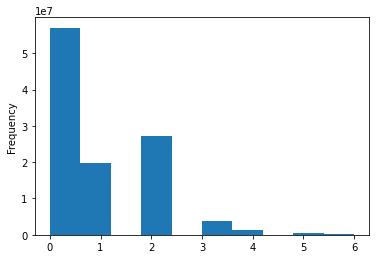

In [12]:
dfTrafBarcelona18_19_20['estatActual'].plot.hist();

De los 55 Mill de registros, unos 25 Mill no tienen medida del tráfico (tienen valor 0). 
Vamos a quitarlos.

In [13]:
#Reseteamos el índice para que sea un número correlativo desde 0 hasta el último nº de fila.
dfTrafBarcelona18_19_20 = dfTrafBarcelona18_19_20.reset_index()
print(dfTrafBarcelona18_19_20)

             index  idTram            data  estatActual  estatPrevist
0                0       1  20180101000554            0             0
1                1       2  20180101000554            0             0
2                2       3  20180101000554            0             0
3                3       4  20180101000554            0             0
4                4       5  20180101000554            0             0
...            ...     ...             ...          ...           ...
109931900  4654459     530  20201231235552            1             0
109931901  4654460     531  20201231235552            1             0
109931902  4654461     532  20201231235552            0             0
109931903  4654462     533  20201231235552            1             0
109931904  4654463     534  20201231235552            1             0

[109931905 rows x 5 columns]


In [14]:
#Eliminamos las filas que tienen 0 en el campo Estado Actual. Nos quedan por tanto unos 30 Mill de registros
#dfTrafBarcelona18_19_20 = dfTrafBarcelona18_19_20.drop(dfTrafBarcelona18_19_20[dfTrafBarcelona18_19_20['estatActual']==0].index)
#print(dfTrafBarcelona18_19_20)

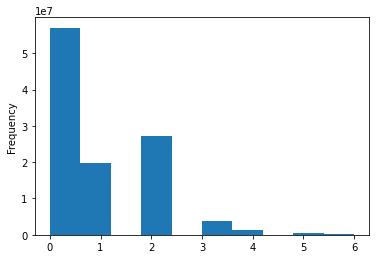

In [15]:
#Volvemos a pintar el histograma habiendo quitado los registros sin dato medido
dfTrafBarcelona18_19_20['estatActual'].plot.hist();

Eliminamos las columnas que no nos interesan para nuestro análisis: el antiguo index y el estado previsto

In [16]:
dfTrafBarcelona18_19_20 = dfTrafBarcelona18_19_20.drop(columns=['index','estatPrevist'])
print(dfTrafBarcelona18_19_20)

           idTram            data  estatActual
0               1  20180101000554            0
1               2  20180101000554            0
2               3  20180101000554            0
3               4  20180101000554            0
4               5  20180101000554            0
...           ...             ...          ...
109931900     530  20201231235552            1
109931901     531  20201231235552            1
109931902     532  20201231235552            0
109931903     533  20201231235552            1
109931904     534  20201231235552            1

[109931905 rows x 3 columns]


In [17]:
#Renombramos los campos
dfTrafBarcelona18_19_20.rename(columns = {'data': 'Fecha', 'estatActual': 'Estado_Actual'}, inplace = True)
print(dfTrafBarcelona18_19_20)

           idTram           Fecha  Estado_Actual
0               1  20180101000554              0
1               2  20180101000554              0
2               3  20180101000554              0
3               4  20180101000554              0
4               5  20180101000554              0
...           ...             ...            ...
109931900     530  20201231235552              1
109931901     531  20201231235552              1
109931902     532  20201231235552              0
109931903     533  20201231235552              1
109931904     534  20201231235552              1

[109931905 rows x 3 columns]


Continuamos con el data frame dfTrafBarcelona18_19_20. Ahora vamos a convertir el campo 'data' en formato Fecha para convertirlo en Indice

In [18]:
#Convertimos el campo 'fecha' en formato fecha y hora
dfTrafBarcelona18_19_20['Fecha'] = pd.to_datetime(dfTrafBarcelona18_19_20['Fecha'], format='%Y%m%d%H%M%S')
print(dfTrafBarcelona18_19_20)

           idTram               Fecha  Estado_Actual
0               1 2018-01-01 00:05:54              0
1               2 2018-01-01 00:05:54              0
2               3 2018-01-01 00:05:54              0
3               4 2018-01-01 00:05:54              0
4               5 2018-01-01 00:05:54              0
...           ...                 ...            ...
109931900     530 2020-12-31 23:55:52              1
109931901     531 2020-12-31 23:55:52              1
109931902     532 2020-12-31 23:55:52              0
109931903     533 2020-12-31 23:55:52              1
109931904     534 2020-12-31 23:55:52              1

[109931905 rows x 3 columns]


In [19]:
dfTrafBarcelona18_19_20_idTram=dfTrafBarcelona18_19_20
#Convertimos el campo 'fecha' en formato fecha y generamos el frame que utilizaremos para exportar medias por id y fecha
dfTrafBarcelona18_19_20_idTram["Fecha"] = dfTrafBarcelona18_19_20["Fecha"].dt.normalize()


In [20]:
dfTrafBarcelona18_19_20_idTram.head()

,idTram,Fecha,Estado_Actual
0,1,2018-01-01,0
1,2,2018-01-01,0
2,3,2018-01-01,0
3,4,2018-01-01,0
4,5,2018-01-01,0


In [21]:
# agruparemos cada valor de las cada tramo a 1 valor media por fecha, asi calculamos valores por fecha para la ciudad de bcn
dfTrafBarcelona18_19_20_idTram= dfTrafBarcelona18_19_20_idTram.groupby(['Fecha','idTram'])['Estado_Actual'].mean()
dfTrafBarcelona18_19_20_idTram.shape

(580854,)

In [22]:
dfTrafBarcelona18_19_20_idTram.head()

Fecha       idTram
2018-01-01  1         1.183673
            2         0.938776
            3         1.142857
            4         1.346939
            5         1.020408
Name: Estado_Actual, dtype: float64

In [23]:
#exportaremos los datos a nivel de mediana por estacion y dia a un csv:
dfTrafBarcelona18_19_20_idTram.to_csv('DatosEstadoTraficoBarcelona_media_idtram_dia_18_19_20.csv') 